# Regularization Figures

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set(rc = {'axes.titlesize': 24,
             'axes.labelsize': 20,
             'xtick.labelsize': 12,
             'ytick.labelsize': 12,
             'figure.figsize': (8, 4.5),
             'figure.dpi': 160})
sns.set_style('white')

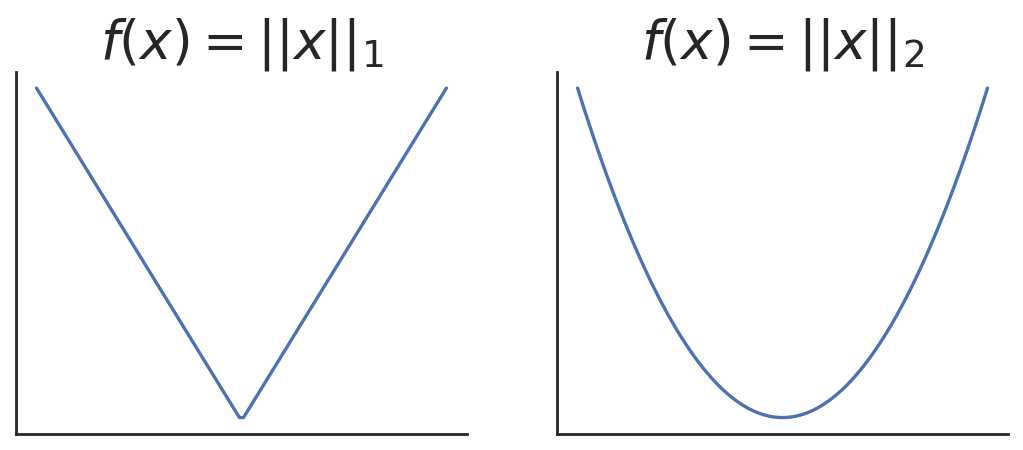

In [2]:
fig = plt.figure(figsize = (8, 3))

plt.subplot(1, 2, 1)
x = np.linspace(1, 5, 100)
y = np.abs(x-3)
plt.plot(x, y)
plt.xticks([])
plt.yticks([])
plt.title('$f(x) = ||x||_1$')

plt.subplot(1, 2, 2)
x = np.linspace(1, 5, 100)
y = (x-3)**2
plt.plot(x, y)
plt.xticks([])
plt.yticks([])
plt.title('$f(x) = ||x||_2$')

sns.despine()
plt.savefig('constraints')

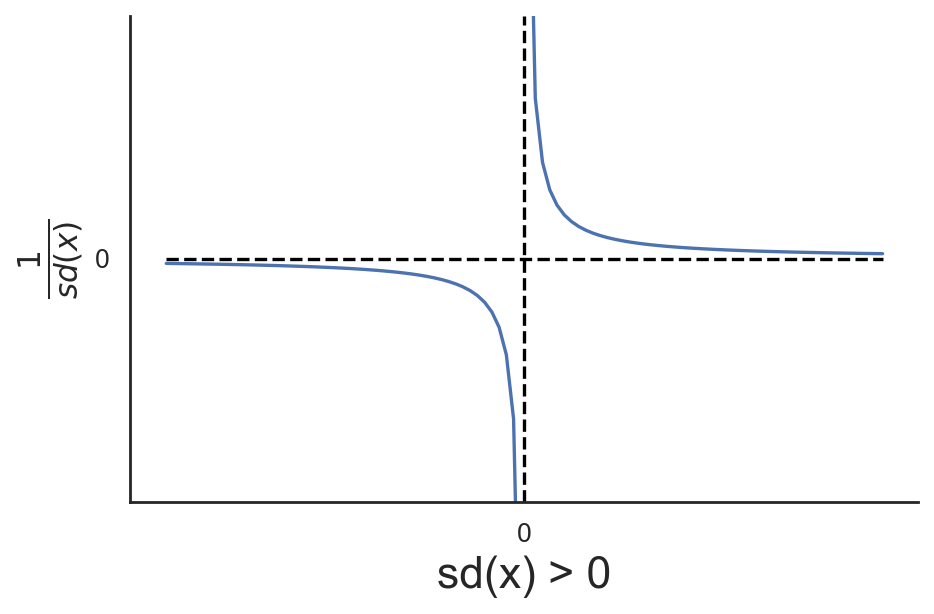

In [3]:
x = np.linspace(-1, 1, 100)
x_left = x[x < 0]
x_right = x[x > 0]

y_left = 1/x_left
y_right = 1/x_right

top = 50
bot = -top

plt.figure(figsize = (6, 4))
plt.vlines(x = 0, ymin = bot, ymax = top, color = 'black', linestyle = 'dashed')
plt.hlines(xmin = -1, xmax = 1, y = 0, color = 'black', linestyle = 'dashed')
plt.plot(x_left, y_left)
plt.plot(x_right, y_right, c = 'b')

plt.ylim(bot, top)
plt.xticks([0])
plt.yticks([0])
plt.xlabel('sd(x) > 0')
plt.ylabel('$\\frac{1}{sd(x)}$')
sns.despine()
plt.tight_layout()
plt.savefig('inverse x')

In [4]:
np.random.seed(490)

n = 100
e = np.random.normal(size = n)
x = np.random.normal(loc = 3, scale = 2, size = n)
y = 3 + 0.5*x + e

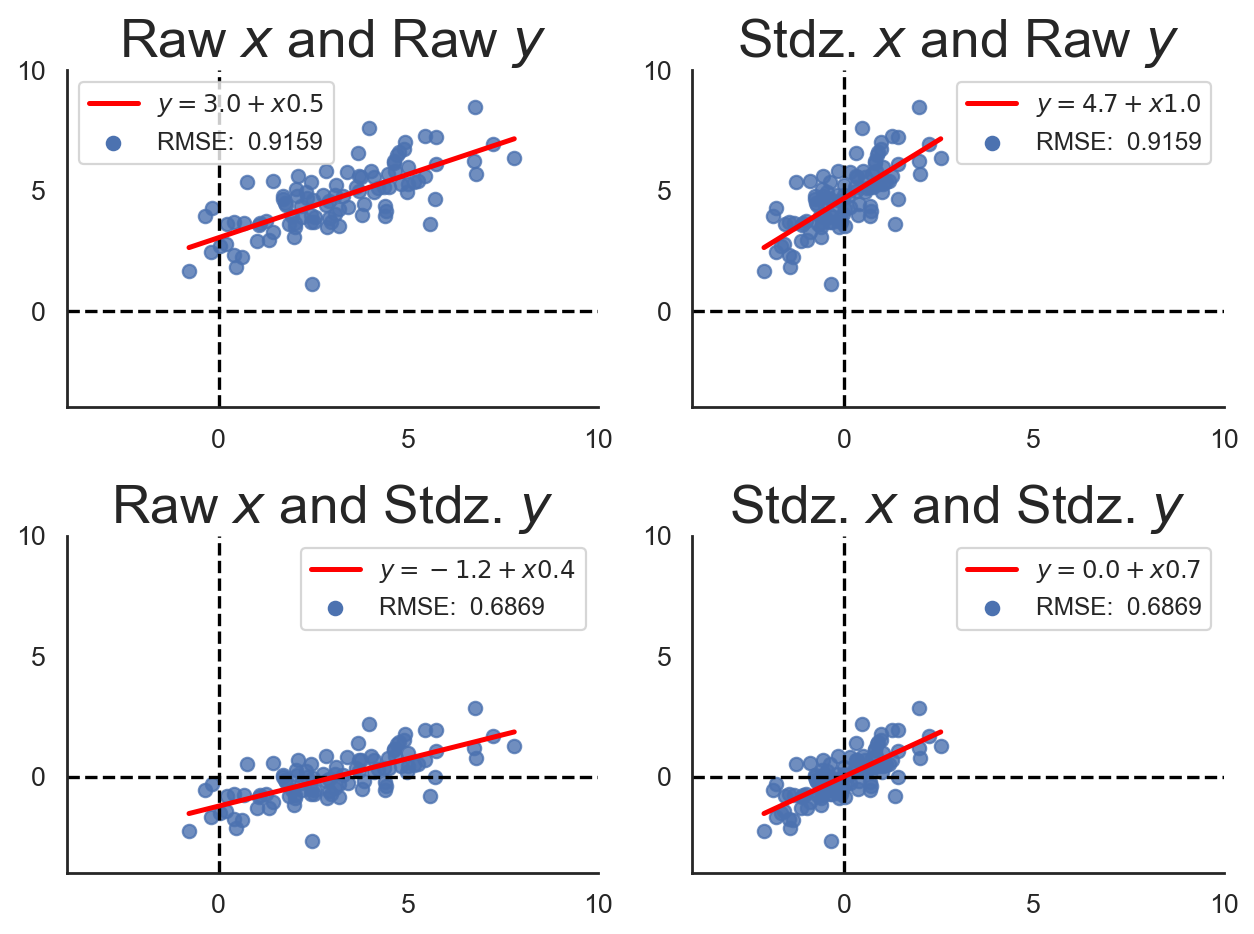

In [5]:
xmin = -4
ymin = xmin

xmax = 10
ymax = xmax

plt.figure(figsize = (8, 6))

#################################
plt.subplot(2, 2, 1)
X = sm.add_constant(x)
beta = inv(X.T @ X) @ X.T @ y
yhat = X@beta
rmse = np.sqrt(np.mean(  ((y - yhat))**2  ))

plt.vlines(x = 0, ymin = ymin, ymax = ymax, color = 'black', linestyle = 'dashed')
plt.hlines(xmin = xmin, xmax = xmax, y = 0, color = 'black', linestyle = 'dashed')
sns.regplot(x = x, y = y, line_kws = {'color': 'red', 'label': '$y={0:.1f}+x{1:.1f}$'.format(beta[0], beta[1])}, ci = None)
plt.scatter(None, None, label = 'RMSE: {0: .4f}'.format(rmse), c = None)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks([0, 5, 10])
plt.yticks([0, 5, 10])
plt.title('Raw $x$ and Raw $y$')
plt.legend()

#################################
plt.subplot(2, 2, 2)
x_std = (x - np.mean(x))/np.std(x)
X_std = sm.add_constant(x_std)
beta = inv(X_std.T @ X_std) @ X_std.T @ y
yhat = X_std@beta
rmse = np.sqrt(np.mean(  ((y - yhat))**2  ))

plt.vlines(x = 0, ymin = ymin, ymax = ymax, color = 'black', linestyle = 'dashed')
plt.hlines(xmin = xmin, xmax = xmax, y = 0, color = 'black', linestyle = 'dashed')
sns.regplot(x = x_std, y = y, line_kws = {'color': 'red', 'label': '$y={0:.1f}+x{1:.1f}$'.format(beta[0], beta[1])}, ci = None)
plt.scatter(None, None, label = 'RMSE: {0: .4f}'.format(rmse), c = None)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks([0, 5, 10])
plt.yticks([0, 5, 10])
plt.title('Stdz. $x$ and Raw $y$')
plt.legend()

#################################
plt.subplot(2, 2, 3)
y_std = (y - np.mean(y))/np.std(y)
beta = inv(X.T @ X) @ X.T @ y_std
yhat = X@beta
rmse = np.sqrt(np.mean(  ((y_std - yhat))**2  ))

plt.vlines(x = 0, ymin = ymin, ymax = ymax, color = 'black', linestyle = 'dashed')
plt.hlines(xmin = xmin, xmax = xmax, y = 0, color = 'black', linestyle = 'dashed')
sns.regplot(x = x, y = y_std, line_kws = {'color': 'red', 'label': '$y={0:.1f}+x{1:.1f}$'.format(beta[0], beta[1])}, ci = None)
plt.scatter(None, None, label = 'RMSE: {0: .4f}'.format(rmse), c = None)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks([0, 5, 10])
plt.yticks([0, 5, 10])
plt.title('Raw $x$ and Stdz. $y$')
plt.legend()

#################################
plt.subplot(2, 2, 4)
Xstd = (x - np.mean(x))/np.std(x)
beta = 1/(Xstd.T @ Xstd) * (Xstd.T @ y_std)
yhat = beta*Xstd
rmse = np.sqrt(np.mean(  ((y_std - yhat))**2  ))

plt.vlines(x = 0, ymin = ymin, ymax = ymax, color = 'black', linestyle = 'dashed')
plt.hlines(xmin = xmin, xmax = xmax, y = 0, color = 'black', linestyle = 'dashed')
sns.regplot(x = Xstd, y = y_std, line_kws = {'color': 'red', 'label': '$y={0:.1f}+x{1:.1f}$'.format(0, beta)}, ci = None)
plt.scatter(None, None, label = 'RMSE: {0: .4f}'.format(rmse), c = None)
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.xticks([0, 5, 10])
plt.yticks([0, 5, 10])
plt.title('Stdz. $x$ and Stdz. $y$')
plt.legend()


sns.despine()
plt.tight_layout()
plt.savefig('standardizing')

In [6]:
beta = inv(X.T @ X) @ X.T @ y
yhat = X@beta
np.sqrt(np.mean(  ((y - yhat))**2  ))

0.9158571158836634

In [7]:
beta = 1/(Xstd.T @ Xstd) * (Xstd.T @ y_std)
yhat = Xstd*beta
np.sqrt(np.mean(  ((y - yhat))**2  ))

4.771253564546205